# Sprint 機械学習スクラッチ ロジスティック回帰

## 1.このSprintについて



### Sprintの目的
- スクラッチを通してロジスティック回帰を理解する
- 分類問題についての基礎を学ぶ

### どのように学ぶか
- スクラッチでロジスティック回帰を実装した後、学習と検証を行なっていきます。

## 2.ロジスティック回帰スクラッチ


ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

### 雛形



```
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return
```



## 【まとめ】最終コード

In [256]:
# ライブラリインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

import pickle
import os
%matplotlib inline

In [299]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, bias=True, verbose=False, q=[], v_interval=1, w_write=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose

        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

        # パラメータ用
        self.w_ = 0

        # 問題8 重み保存するか(真偽)
        self.w_write = w_write

        # 課題提出用（問題番号）
        self.q = q
        self.count = 0
        self.v_interval = v_interval



    def fit(self, X, y, X_val=None, y_val=None, c=1.0):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        # 正則化パラメータ
        self.c_ = c

        # テストデータの有無
        if np.all(X_val != None) and np.all(y_val != None):
            self.val = True
        else:
            self.val = False
        
        # サンプル数
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        if self.val:
            self.n_samples_val = X_val.shape[0]
            self.n_features_val = X_val.shape[1]

        # wのパラメータ初期値の設定
        X, X_val = self._set_params(X, X_val)

        # メイン処理
        for i in range(self.iter):
            self.count = i
            # 目的関数の計算
            y_hat = self._logistic_hypothesis(X)
            
            # 勾配計算
            self.w_, error = self._gradient_descent(X, y, y_hat)

            # 損失関数
            self.loss[i] = self._loss_func(X, y, error, y_hat)

            # テストデータへの処理
            if self.val:
                # 目的関数の計算
                y_val_hat = self._logistic_hypothesis(X_val)
                # 勾配計算
                _, val_error = self._gradient_descent(X_val, y_val, y_val_hat)
                # 損失関数
                self.val_loss[i] = self._loss_func(X_val, y_val, val_error, y_val_hat)

            if self.verbose and self.count % self.v_interval == 0:
                #verboseをTrueにした際は学習過程を出力
                print('[INFO] Loop count =', self.count)
                print('[INFO] update_w\n', self.w_)

        # 問題8 アドバンス問題 重み保存
        if self.w_write:
            self.write_params(self.w_)




    # wパラメータの初期化
    def _set_params(self, X, X_val):
        """
        パラメータの初期設定

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            説明変数
        X_val : ndarray, shape (n_samples, n_features)
            検証データの説明変数

        Returns
        -------
        X : ndarray, shape (n_samples, n_features)
            説明変数
        X_val : ndarray, shape (n_samples, n_features)
            検証データの説明変数

        """
        # bias=Trueのとき特徴量カラムを1列追加
        if self.bias:
            print('[INFO] bias=True')
            # トレーニングデータ
            self.n_features +=1
            X = np.concatenate([np.ones([self.n_samples, 1]), X], axis=1)

            # テストデータ
            if self.val:
                X_val = np.concatenate([np.ones([self.n_samples_val, 1]), X_val], axis=1)

        # パラメータ初期値設定
        # self.w = np.random.randn(self.n_features) + 0.1
        self.w_ = np.full(self.n_features,2)  # テスト用に固定値代

        return X, X_val




    # 問題1
    # 仮定関数・シグモイド関数
    def _logistic_hypothesis(self, X):
        """
        シグモイド関数を使用した仮定関数の処理

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            説明変数

        Returns
        -------
        g_z : ndarray, shape (n_features, )
            推定値の計算結果

        """
        z = X @ self.w_.T
        g_z = 1 / (1 + np.exp(-z))

        # 画面へ標準出力
        self.q_print('z', z, q=1, loop_count=self.count)
        self.q_print('g_z', g_z, q=1, loop_count=self.count)

        return g_z




    # 問題2
    # 最急降下法
    def _gradient_descent(self, X, y, y_hat):
        """
        最急降下法を実行してパラメータの更新値を算出する。

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            説明変数
        y : ndarray, shape (n_samples, )
            目的変数
        y_hat : ndarray, shape (n_samples, )

        Returns
        -------
        update_w : ndarray, shape (n_features, )
            更新後のパラメータの値
        error :  ndarray, shape(nsamples, )
            推定値と実測値の誤差

        """
        # 誤差算出
        error = (y_hat - y).reshape(-1, 1)
        
        # パラメータの更新値算出
        update_w = self.w_ - self.lr * ((np.sum(error * X, axis=0) / self.n_samples))
        update_w[1:] -= self.lr * (self.c_ / self.n_samples * self.w_[1:])  # バイアス以外に正則化項を適用

        # 表示用
        self.q_print('誤差', error, q=2, loop_count=self.count)
        self.q_print('wの更新値', update_w, q=2, loop_count=self.count)
        
        return update_w, error




    # 問題3
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # バイアスの追加
        if self.bias:
            X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=1)     
        
        # 予測値を計算
        y_pred = np.where(self._logistic_hypothesis(X) >= 0.5, 1, 0)

        return y_pred



    # 問題3
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # バイアスの追加
        if self.bias:
            X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=1)
        
        # 
        y_proba = np.zeros([X.shape[0], 2])
        y_proba[:,0] = 1 - self._logistic_hypothesis(X)
        y_proba[:,1] = self._logistic_hypothesis(X)
        return y_proba



    # 問題4
    # 損失関数
    def _loss_func(self, X, y, error, y_hat):
        """
        損失関数を計算

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            説明変数
        y : ndarray, shape (n_samples, )
            目的変数
        error : ndarray, shape (n_samples, )
        y_hat : ndarray, shape (n_samples, )

        Returns
        -------
        loss : float
            損失関数の値
            
        """

        y = y.reshape(-1,1)
        loss = np.sum(-y * np.log(y_hat) - (1-y) * np.log(1-y_hat)) / X.shape[0] + self.c_ * np.sum(self.w_**2) / (2 * X.shape[0])

        # 標準出力
        self.q_print('loss', loss, q=4, loop_count=self.count)

        return loss




    # 問題8 アドバンス問題 重みを保存
    def write_params(self, w):
        """
        学習結果のパラメータをファイルへ保存

        Parameters
        ----------
        w : numpy.ndarray
            学習結果のパラメータ
        """
        file_path = './sample2.txt'             # ファイル名を保持
        is_file = os.path.exists(file_path)    # ファイルの有無(真偽)を保持
        data = []
        # ファイルが既に存在する場合はファイル内のデータの最後に
        # 今回のパラメータを追加して、data変数へ格納
        if is_file:
            with open(file_path, 'rb') as f:
                data = pickle.load(f)
                data.append(w)
        # ファイルが存在しない場合は空のリストへ追加
        else:
            data.append(w)
        # 変数データを対象のファイルへ書き込み
        with open(file_path, 'wb') as f:
            pickle.dump(data, f)
        del data, w, file_path



    # 課題提出用print関数
    def q_print(self, text, value, q=0, loop_count=None):
        if q in self.q:
            if loop_count != None:
                print('[INFO] Loop count :', loop_count)
            print('[INFO] {} : {}'.format(text, value))

## 【問題1】仮定関数

ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。

$$
  g_{(z)} = 
  \frac{1}{1+e^z}
$$

線形回帰の仮定関数は次の式でした。

$$
  h_{(\theta)} = 
  \theta^T \cdot x
$$

まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。

$$
  g_{(z)} = 
  \frac{1}{1+e^{\theta^T \cdot x}}
$$

- x : 特徴量ベクトル
- θ : パラメータ（重み）ベクトル

In [272]:
# サンプルデータ
x = np.array([[0, 1],
              [1, 1],
              [0, 0],
              [1, 0]]
             )
y = np.array([1, 1, 0, 0])

In [276]:
slr1 = ScratchLogisticRegression(num_iter=1, lr=0.01, bias=True, verbose=False, q=[1])
slr1.fit(x, y)

[INFO] bias=True
[INFO] Loop count : 0
[INFO] z : [4. 6. 2. 4.]
[INFO] Loop count : 0
[INFO] g_z : [0.98201379 0.99752738 0.88079708 0.98201379]


## 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$$
  \theta_j := 
  \theta_j - \alpha\frac{\partial{J_{(\theta)}}}{\partial{\theta_j}}
$$
\begin{align}
  \frac{\partial{J_{(\theta)}}}{\partial{\theta_0}} 
  &= \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}\, ,\: (j = 0) \\
  \frac{\partial{J_{(\theta)}}}{\partial{\theta_j}} 
  &= (\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}) + 
     \frac{\lambda}{m}\theta_j \, ,\: (j \geq 1)
\end{align}

- $α$ : 学習率
- $i$ : サンプルのインデックス
- $j$ : 特徴量のインデックス
- $m$ : 入力されるデータの数
- $h_θ()$ : 仮定関数
- $x$ : 特徴量ベクトル
- $θ$ : パラメータ（重み）ベクトル
- $x_{(i)}$ : i番目のサンプルの特徴量ベクトル
- $y_{(i)} : i番目のサンプルの正解ラベル
- $θ_j$ : j番目のパラメータ（重み）
- $λ$ : 正則化パラメータ

In [277]:
slr2 = ScratchLogisticRegression(num_iter=5, lr=0.1, bias=True, verbose=False, q=[2], v_interval=1)
slr2.fit(x, y)

[INFO] bias=True
[INFO] Loop count : 0
[INFO] 誤差 : [[-0.01798621]
 [-0.00247262]
 [ 0.88079708]
 [ 0.98201379]]
[INFO] Loop count : 0
[INFO] wの更新値 : [1.9539412  1.92551147 1.95051147]
[INFO] Loop count : 1
[INFO] 誤差 : [[-0.0197539 ]
 [-0.00292957]
 [ 0.87587575]
 [ 0.97975615]]
[INFO] Loop count : 1
[INFO] wの更新値 : [1.90811749 1.85295302 1.90231577]
[INFO] Loop count : 2
[INFO] 誤差 : [[-0.02165908]
 [-0.00345874]
 [ 0.87080751]
 [ 0.97726985]]
[INFO] Loop count : 2
[INFO] wの更新値 : [1.8625435  1.78228392 1.85538582]
[INFO] Loop count : 3
[INFO] 誤差 : [[-0.02370846]
 [-0.00406927]
 [ 0.86559314]
 [ 0.97453927]]
[INFO] Loop count : 3
[INFO] wの更新値 : [1.81723463 1.71346507 1.80969562]
[INFO] Loop count : 4
[INFO] 誤差 : [[-0.0259086 ]
 [-0.0047711 ]
 [ 0.86023397]
 [ 0.97154876]]
[INFO] Loop count : 4
[INFO] wの更新値 : [1.77220706 1.646459   1.76522022]


## 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

仮定関数 
$h_θ(x)$ の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

In [279]:
slr3 = ScratchLogisticRegression(num_iter=1000, lr=0.1, bias=True, verbose=False, q=[], v_interval=1000)
slr3.fit(x, y)
y_pred = slr3.predict(x)
print(y_pred)

[INFO] bias=True
[1 1 0 0]


In [280]:
y_proba = slr3.predict_proba(x)
print(y_proba)

[[0.40105803 0.59894197]
 [0.40105811 0.59894189]
 [0.59894168 0.40105832]
 [0.59894176 0.40105824]]


## 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

なお、この数式には正則化項が含まれています。

＊数式が見切れる場合、DIVERを全画面にして御覧ください。

$$
  J_{(\theta)}
  = \frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log{(h_\theta(x^{(i)})) 
  - (1 - y^{(i)})\log(1-h_\theta(x^{(i)}))}]
  + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2
$$

- $m$ : 入力されるデータの数
- $h_θ()$ : 仮定関数
- $x$ : 特徴量ベクトル
- $θ$ : パラメータ（重み）ベクトル
- $x^{(i)}$ : i番目のサンプルの特徴量ベクトル
- $y-{(i)}$ : i番目のサンプルの正解ラベル
- $θ_j$ : j番目のパラメータ（重み）
- $n$ : 特徴量の数
- $\lambda$ : 正則化パラメータ

In [282]:
slr4 = ScratchLogisticRegression(num_iter=10, lr=0.1, bias=True, verbose=False, q=[], v_interval=1)
slr4.fit(x, y, x, y)
print('loss :\n', slr4.loss)
print('val_loss :\n', slr4.val_loss)

[INFO] bias=True
loss :
 [9.58195051 9.29641749 9.01919998 8.75012192 8.48902074 8.23574656
 7.99016138 7.75213826 7.52156041 7.29832022]
val_loss :
 [9.37602038 9.09483644 8.82196671 8.55724011 8.30049879 8.05159724
 7.81040148 7.57678811 7.35064334 7.13186197]


## 3.検証

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [92]:
from sklearn.datasets import load_iris
iris = load_iris()

In [284]:
# データを用意
iris_data = np.concatenate([iris['data'], iris['target'][:, np.newaxis]], axis=1)
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
df = pd.DataFrame(iris_data, columns=columns)
df = df[df['target'] > 0]
df['target'] = df['target'].map({1.0:0, 2.0:1})
df = df[['sepal_length', 'petal_length', 'target']]
df.head()

,sepal_length,petal_length,target
50,7.0,4.7,0
51,6.4,4.5,0
52,6.9,4.9,0
53,5.5,4.0,0
54,6.5,4.6,0


In [286]:
# データを分割（ndarryで保持）
X_train, X_test, y_train, y_test = [np.array(i) for i in train_test_split(df.drop('target', axis=1).copy(), df['target'].copy(), test_size=0.3, random_state=0)]

In [287]:
# 学習
slr5 = ScratchLogisticRegression(num_iter=1001, lr=0.05, bias=True, verbose=True, q=[], v_interval=1000)
slr5.fit(X_train, y_train, X_test, y_test)

[INFO] bias=True
[INFO] Loop count = 0
[INFO] update_w
 [1.975      1.84992857 1.89221429]
[INFO] Loop count = 1000
[INFO] update_w
 [ 0.06888849 -1.92001521  2.46918726]


In [288]:
# 予測実行
y_pred5_1 = slr5.predict(X_test)
score5_1 = metrics.accuracy_score(y_test, y_pred5_1)
print(y_pred5_1)
score5_1

[0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1]


0.9

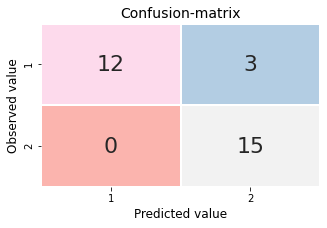

              precision    recall  f1-score   support

  virgicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



In [289]:
# 混同行列
def cf_matrix(data):
    plt.figure(figsize=(5, 3))
    sns.heatmap(data, cmap='Pastel1', cbar=False, annot_kws={"size": 22}, annot=True, fmt="d", linewidths=1)
    plt.title("Confusion-matrix", fontsize=14)
    plt.xlabel("Predicted value", fontsize=12)
    plt.ylabel("Observed value", fontsize=12)
    plt.show()

confusion = metrics.confusion_matrix(y_test, y_pred5_1)
cf_df = pd.DataFrame(confusion, index=[1,2], columns=[1,2])
cf_matrix(cf_df)

# 評価指標
target_names = ['virgicolor', 'virginica']
a = metrics.classification_report(y_test, y_pred5_1, target_names=target_names)
print(a)

In [180]:
# scikit-learnで実行
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
# 予測
y_pred5_2 = lr.predict(X_test)
score5_2 = metrics.accuracy_score(y_test, y_pred5_2)
score5_2

0.8666666666666667

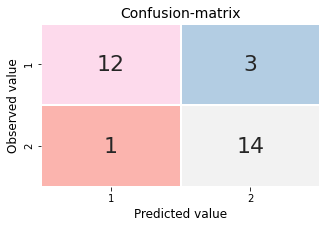

              precision    recall  f1-score   support

  virgicolor       0.92      0.80      0.86        15
   virginica       0.82      0.93      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



In [290]:
# 混同行列と評価指標
confusion = metrics.confusion_matrix(y_test, y_pred5_2)
cf_df = pd.DataFrame(confusion, index=[1,2], columns=[1,2])
cf_matrix(cf_df)
b = metrics.classification_report(y_test, y_pred5_2, target_names=target_names)
print(b)

## 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

In [185]:
# グラフ描写用
def learning_curve(loss1, val_loss1, loss2=None, val_loss2=None):
    sub = True if np.all(val_loss2 != None) else False
    
    if sub:
        fig = plt.figure(figsize=(12, 5))
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)
    else:
        fig = plt.figure(figsize=(6,5))
        ax1 = fig.add_subplot(111)

    ax1.plot(loss1, label='loss')
    ax1.plot(val_loss1, label='val_loss')
    ax1.grid(True)

    if sub:
        ax2.plot(loss2, label='loss')
        ax2.plot(val_loss2, label='val_loss')
        ax2.grid(True)
    plt.show()

In [293]:
# 学習
slr6 = ScratchLogisticRegression(num_iter=5001, lr=0.001, bias=True, verbose=True, q=[], v_interval=5000)
slr6.fit(X_train, y_train, X_test, y_test)

[INFO] bias=True
[INFO] Loop count = 0
[INFO] update_w
 [1.9995     1.99699857 1.99784429]
[INFO] Loop count = 5000
[INFO] update_w
 [ 1.41574888 -0.73406001  0.68562019]


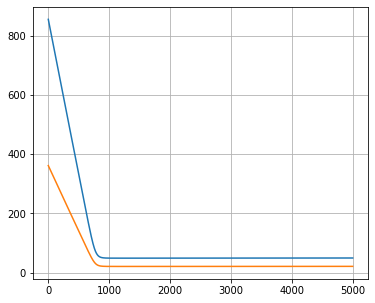

In [294]:
# グラフ化
learning_curve(slr6.loss, slr6.val_loss)

## 【問題7】決定領域の可視化
決定領域を可視化してください。

In [295]:
def decision_region(X, y, model, step=0.01, title='decision region', 
                    xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'],
                    n_class=2):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """

    # setting
    if n_class == 2:
        scatter_color = ['red', 'blue']
        contourf_color = ['pink', 'skyblue']
    elif n_class == 3:
        scatter_color = ['green', 'red', 'blue']
        contourf_color = ['lightgreen', 'pink', 'skyblue']

    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, 
                                             np.max(X[:,0])+0.5, step), 
                                   np.arange(np.min(X[:,1])-0.5, 
                                             np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    y = np.squeeze(y)  # 2020-08-10 追加
    for i, target in enumerate(set(list(y))):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

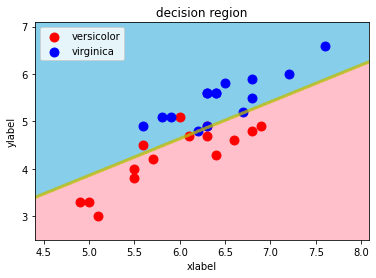

In [296]:
decision_region(X_test, y_test.reshape(-1,1), slr5)

## 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。

下記をScratchLogisticRegressionへ追加



```
def write_params(self, w):
    """
    学習結果のパラメータをファイルへ保存

    Parameters
    ----------
    w : numpy.ndarray
      パラメータ
    """
    file_path = './sample2.txt'             # ファイル名を保持
    is_file = os.path.exists(file_path)    # ファイルの有無(真偽)を保持
    data = []
    # ファイルが既に存在する場合はファイル内のデータの最後に
    # 今回のパラメータを追加して、data変数へ格納
    if is_file:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
            data.append(w)
    # ファイルが存在しない場合は空のリストへ追加
    else:
        data.append(w)
    # 変数データを対象のファイルへ書き込み
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)
    del data, w, file_path
```



In [297]:
# 下記のループ回数を変更して複数パターン実行
slr8 = ScratchLogisticRegression(num_iter=101, lr=0.05, bias=True, verbose=True, q=[], v_interval=100, w_write=True)
slr8.fit(X_train, y_train, X_test, y_test)

[INFO] bias=True
[INFO] Loop count = 0
[INFO] update_w
 [1.975      1.84992857 1.89221429]
[INFO] Loop count = 100
[INFO] update_w
 [ 1.41369474 -0.73782386  0.6908248 ]


In [298]:
# 読み込み・表示
file_path = './sample2.txt'
with open(file_path, 'rb') as f:
    data = pickle.load(f)
data

[array([ 0.06888849, -1.92001521,  2.46918726]),
 array([ 0.06888849, -1.92001521,  2.46918726]),
 array([ 1.41369474, -0.73782386,  0.6908248 ]),
 array([ 1.41369474, -0.73782386,  0.6908248 ])]